## Cannabidiol induces antioxidant pathways in keratinocytes by targeting BACH1

#### RNA-seq Analysis Kristen Michelle Nader r0771801

This paper introduces the potential of Cannabidiol(CBD) as a therapeutic agent for skin disorders. The findings revealed that CBD regulated major pathways involved in human primary keratinocytes: keratin differentiation, skin development and epidermal cell differentiation. This was achieved through upregulation of heme oxidase 1(HMOX1) and degradation of transcriptional repressor (BACH1). Therefore leading researchers to targeting BACH1 for CBD.
The image below represents a standard protocal for bulk RNA-seq data represented in 3 jupyter notebooks, 2 Bash and 1 R kernel. 

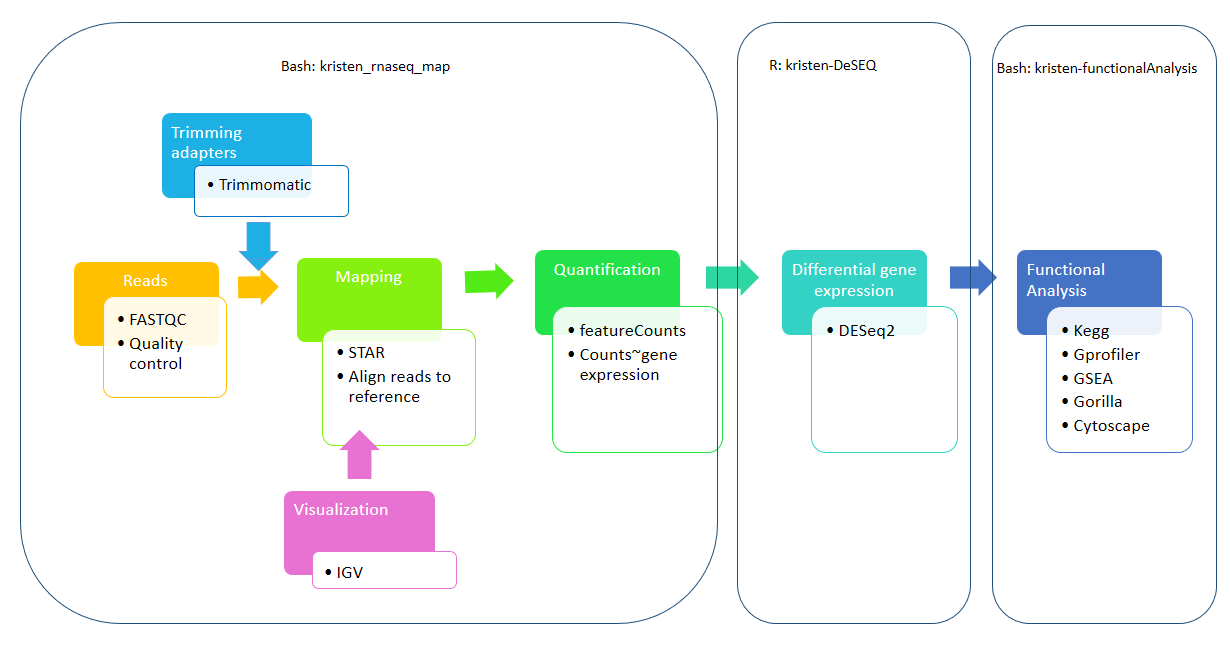

In [ ]:
vdb-config -s /repository/user/cache-disabled=true

## Acquire *Reads* for analysis 

We use fastq-dump to import the fastq files from GEOdatasets. I have chosen to work on 2 replicates of the control data and 2 replicates of the experimental data. There are 3 replicates available for each Control and Experiemtnal Set-up: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE131565
<font color=green>SRR9102523</font>-Control  
<font color=green>SRR9102524</font>-Control  
<font color=green>SRR9102526</font>-Experimental  
<font color=green>SRR9102527</font>-Experimental  

In [12]:
fastq-dump --split-files SRR9102523

Read 37204364 spots for SRR9102523
Written 37204364 spots for SRR9102523


In [54]:
fastq-dump --split-files SRR9102524

Read 37543809 spots for SRR9102524
Written 37543809 spots for SRR9102524


In [15]:
fastq-dump --split-files SRR9102526

Read 40915685 spots for SRR9102526
Written 40915685 spots for SRR9102526


In [55]:
fastq-dump --split-files SRR9102527

Read 46686291 spots for SRR9102527
Written 46686291 spots for SRR9102527


Rename the files to a human-readable format

In [18]:
mv SRR9102523_1.fastq SRR9102523_1_C1.fastq

In [56]:
mv SRR9102524_1.fastq SRR9102524_1_C2.fastq

In [21]:
mv SRR9102526_1.fastq SRR9102526_1_CBD1.fastq

In [57]:
mv SRR9102527_1.fastq SRR9102527_1_CBD2.fastq

In [3]:
mkdir -p fastqc_dir
ls

Aligned.out.sam                      SRR9102524_1_C2.bam.bai
all.counts                           SRR9102524_1_C2.fastq
all.counts.summary                   SRR9102524_1_C2.Log.final.out
all.gene.counts                      SRR9102524_1_C2.Log.out
all.genedata.tsv                     SRR9102524_1_C2.Log.progress.out
fastqc_dir                           SRR9102524_1_C2.SJ.out.tab
functional_analysis_gene_signatures  SRR9102526_1_CBD1.Aligned.out.sam
gencode.v19.nopseudo.plus.sort.gtf   SRR9102526_1_CBD1.bam
kristen_ass1.ipynb                   SRR9102526_1_CBD1.bam.bai
kristen-DeSEQ.ipynb                  SRR9102526_1_CBD1.fastq
kristen-functionalAnalysis.ipynb     SRR9102526_1_CBD1.Log.final.out
Log.out                              SRR9102526_1_CBD1.Log.out
Log.progress.out                     SRR9102526_1_CBD1.Log.progress.out
SRR9102523_1_C1.Aligned.out.sam      SRR9102526_1_CBD1.SJ.out.tab
SRR9102523_1_C1.bam                  SRR9102527_1_CBD2.Aligned.out.sam
SRR9102523_1_C1.bam.bai

In [1]:
tail SRR9102523_1_C1.fastq

+SRR9102523.37204362 D00733:348:CCMFVANXX:2:2314:21069:101402 length=50
CCCCBGFEGGGGGGGGGGGGGGGGGGGGFGGGGGGGGGGGGGGGGGGGGG
@SRR9102523.37204363 D00733:348:CCMFVANXX:2:2314:21094:101415 length=50
CCCAAGCCTTCAAACGGAGCTCCCACAGCAATATCCTGAAATCCATCCTG
+SRR9102523.37204363 D00733:348:CCMFVANXX:2:2314:21094:101415 length=50
?BBBC0FDGGEFEGGGGGGBGGGGEGGGGGGEGGGGGGFGGGCCFGGGGC
@SRR9102523.37204364 D00733:348:CCMFVANXX:2:2314:21299:101399 length=50
GGGCTAGCCTTCTGGCCTGGGAGAGGATCATTCAGCATAACTTTTGTTTG
+SRR9102523.37204364 D00733:348:CCMFVANXX:2:2314:21299:101399 length=50
BBBBBGG>BGGGGGEGBGGGGFGGGGEGGEGGGGGEGGEGGGGGGGGGGG


In [4]:
ls

Aligned.out.sam                      SRR9102524_1_C2.bam.bai
all.counts                           SRR9102524_1_C2.fastq
all.counts.summary                   SRR9102524_1_C2.Log.final.out
all.gene.counts                      SRR9102524_1_C2.Log.out
all.genedata.tsv                     SRR9102524_1_C2.Log.progress.out
fastqc_dir                           SRR9102524_1_C2.SJ.out.tab
functional_analysis_gene_signatures  SRR9102526_1_CBD1.Aligned.out.sam
gencode.v19.nopseudo.plus.sort.gtf   SRR9102526_1_CBD1.bam
kristen_ass1.ipynb                   SRR9102526_1_CBD1.bam.bai
kristen-DeSEQ.ipynb                  SRR9102526_1_CBD1.fastq
kristen-functionalAnalysis.ipynb     SRR9102526_1_CBD1.Log.final.out
Log.out                              SRR9102526_1_CBD1.Log.out
Log.progress.out                     SRR9102526_1_CBD1.Log.progress.out
SRR9102523_1_C1.Aligned.out.sam      SRR9102526_1_CBD1.SJ.out.tab
SRR9102523_1_C1.bam                  SRR9102527_1_CBD2.Aligned.out.sam
SRR9102523_1_C1.bam.bai

## Quality Control on Reads- FASTQC

We run fastqc to determine the quality of the reads of each replicate.

In [5]:
/usr/bin/fastqc -o ./fastqc_dir/ SRR9102523_1_C1.fastq

Started analysis of SRR9102523_1_C1.fastq
Approx 5% complete for SRR9102523_1_C1.fastq
Approx 10% complete for SRR9102523_1_C1.fastq
Approx 15% complete for SRR9102523_1_C1.fastq
Approx 20% complete for SRR9102523_1_C1.fastq
Approx 25% complete for SRR9102523_1_C1.fastq
Approx 30% complete for SRR9102523_1_C1.fastq
Approx 35% complete for SRR9102523_1_C1.fastq
Approx 40% complete for SRR9102523_1_C1.fastq
Approx 45% complete for SRR9102523_1_C1.fastq
Approx 50% complete for SRR9102523_1_C1.fastq
Approx 55% complete for SRR9102523_1_C1.fastq
Approx 60% complete for SRR9102523_1_C1.fastq
Approx 65% complete for SRR9102523_1_C1.fastq
Approx 70% complete for SRR9102523_1_C1.fastq
Approx 75% complete for SRR9102523_1_C1.fastq
Approx 80% complete for SRR9102523_1_C1.fastq
Approx 85% complete for SRR9102523_1_C1.fastq
Approx 90% complete for SRR9102523_1_C1.fastq
Approx 95% complete for SRR9102523_1_C1.fastq
Analysis complete for SRR9102523_1_C1.fastq


I will analyze the FastQC results for replicate 1 of the control and experimental replicates. The output of FastQC is an html and a zip file. The zip file contains a copy of all the plots that are visualized in the html file. For *SRR9102523_1_C1.fastq* we have the following plots. The *Per Base Sequence Quality* plot provides an overview on the quality of all bases across the positions in the FastQ file provided as input. The x-axis represents the position in the read ( 50bp reads in this case)) whereas the y-axis represents the quality scores. The higher the quality scores, the better the base calling. This plot is further seperated into 3 sections: 38-28: very good quality scores, 28-20: moderate quality scores and 20-0: poor quality scores. It is normal to find lower quality scores in the beginning, this is to allow the machine to calibrate.It is also normal to see a drop towards the end, this is due to the degradation of enzymes in the sequencer. The plot below shows very good quality scores for all positions and therefore passes this quality control section.

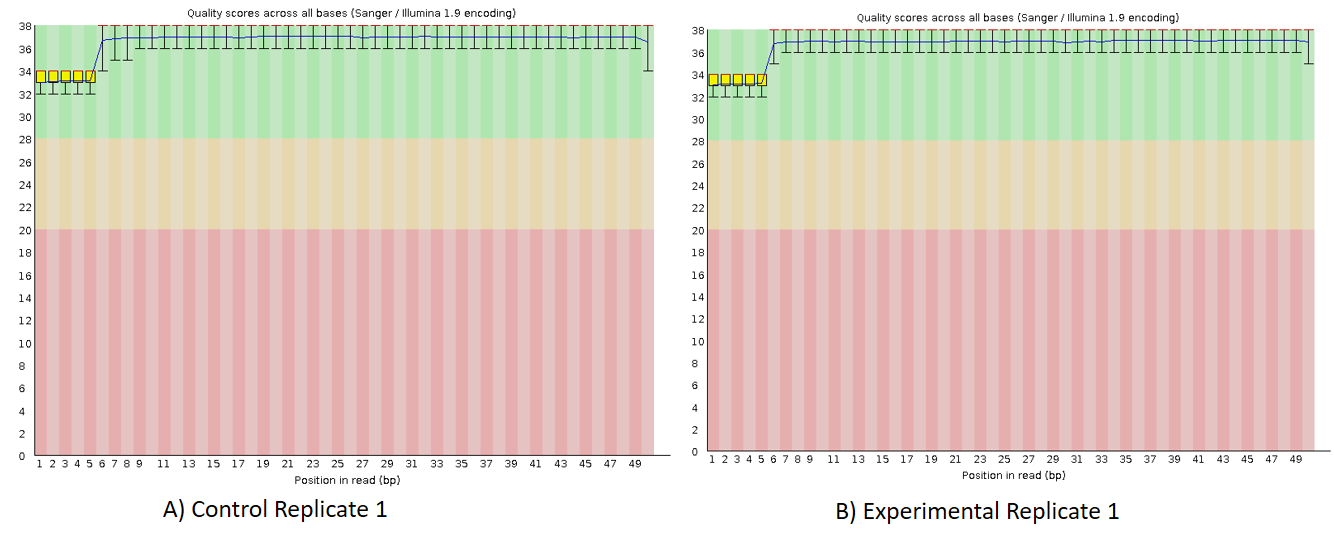

The *Per base sequence content* can be visualized below. The plot shows fluctuation at the beginning positions but then stabilizes later which is normal even if it indicates that it failed this quality control step.

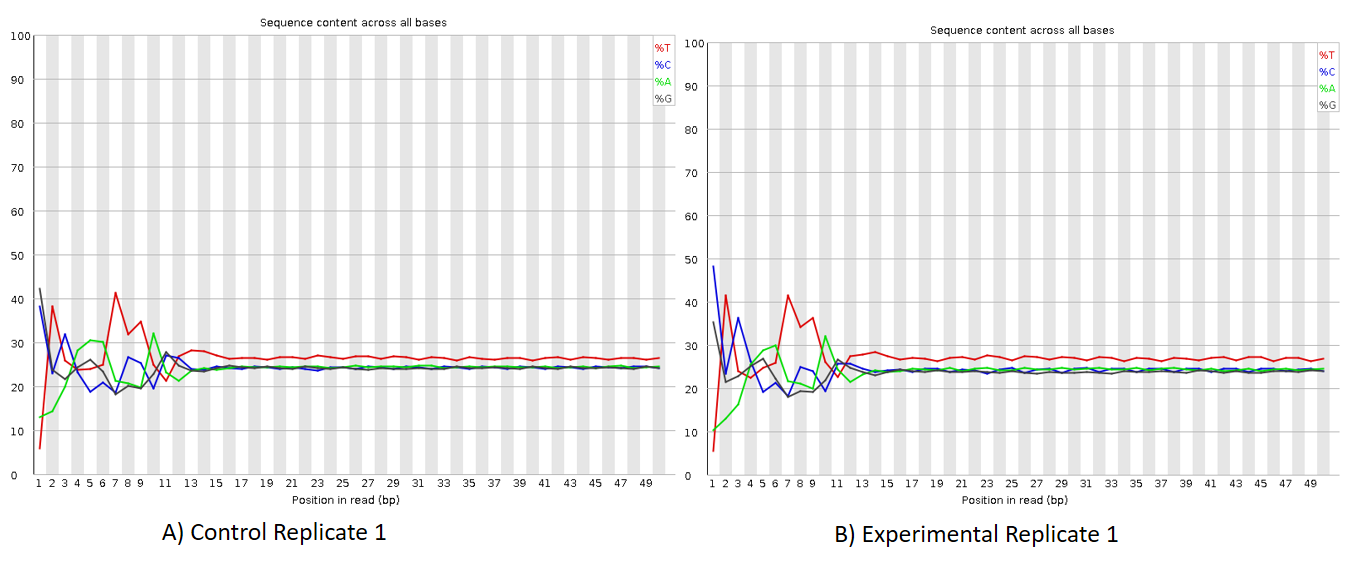

The next section is on the Overrepresented sequences. This table will show us if there needs to be a trimming set to remove any adapters. Trimming can be done using the Trimmomatic tool. The table shows no overrepresented sequences and no trimming was done.
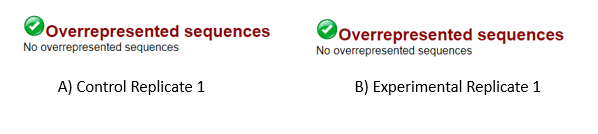

In [7]:
/usr/bin/fastqc -o ./fastqc_dir/ SRR9102524_1_C2.fastq

Started analysis of SRR9102524_1_C2.fastq
Approx 5% complete for SRR9102524_1_C2.fastq
Approx 10% complete for SRR9102524_1_C2.fastq
Approx 15% complete for SRR9102524_1_C2.fastq
Approx 20% complete for SRR9102524_1_C2.fastq
Approx 25% complete for SRR9102524_1_C2.fastq
Approx 30% complete for SRR9102524_1_C2.fastq
Approx 35% complete for SRR9102524_1_C2.fastq
Approx 40% complete for SRR9102524_1_C2.fastq
Approx 45% complete for SRR9102524_1_C2.fastq
Approx 50% complete for SRR9102524_1_C2.fastq
Approx 55% complete for SRR9102524_1_C2.fastq
Approx 60% complete for SRR9102524_1_C2.fastq
Approx 65% complete for SRR9102524_1_C2.fastq
Approx 70% complete for SRR9102524_1_C2.fastq
Approx 75% complete for SRR9102524_1_C2.fastq
Approx 80% complete for SRR9102524_1_C2.fastq
Approx 85% complete for SRR9102524_1_C2.fastq
Approx 90% complete for SRR9102524_1_C2.fastq
Approx 95% complete for SRR9102524_1_C2.fastq
Analysis complete for SRR9102524_1_C2.fastq


In [8]:
/usr/bin/fastqc -o ./fastqc_dir/ SRR9102526_1_CBD1.fastq

Started analysis of SRR9102526_1_CBD1.fastq
Approx 5% complete for SRR9102526_1_CBD1.fastq
Approx 10% complete for SRR9102526_1_CBD1.fastq
Approx 15% complete for SRR9102526_1_CBD1.fastq
Approx 20% complete for SRR9102526_1_CBD1.fastq
Approx 25% complete for SRR9102526_1_CBD1.fastq
Approx 30% complete for SRR9102526_1_CBD1.fastq
Approx 35% complete for SRR9102526_1_CBD1.fastq
Approx 40% complete for SRR9102526_1_CBD1.fastq
Approx 45% complete for SRR9102526_1_CBD1.fastq
Approx 50% complete for SRR9102526_1_CBD1.fastq
Approx 55% complete for SRR9102526_1_CBD1.fastq
Approx 60% complete for SRR9102526_1_CBD1.fastq
Approx 65% complete for SRR9102526_1_CBD1.fastq
Approx 70% complete for SRR9102526_1_CBD1.fastq
Approx 75% complete for SRR9102526_1_CBD1.fastq
Approx 80% complete for SRR9102526_1_CBD1.fastq
Approx 85% complete for SRR9102526_1_CBD1.fastq
Approx 90% complete for SRR9102526_1_CBD1.fastq
Approx 95% complete for SRR9102526_1_CBD1.fastq
Analysis complete for SRR9102526_1_CBD1.fastq

In [9]:
/usr/bin/fastqc -o ./fastqc_dir/ SRR9102527_1_CBD2.fastq

Started analysis of SRR9102527_1_CBD2.fastq
Approx 5% complete for SRR9102527_1_CBD2.fastq
Approx 10% complete for SRR9102527_1_CBD2.fastq
Approx 15% complete for SRR9102527_1_CBD2.fastq
Approx 20% complete for SRR9102527_1_CBD2.fastq
Approx 25% complete for SRR9102527_1_CBD2.fastq
Approx 30% complete for SRR9102527_1_CBD2.fastq
Approx 35% complete for SRR9102527_1_CBD2.fastq
Approx 40% complete for SRR9102527_1_CBD2.fastq
Approx 45% complete for SRR9102527_1_CBD2.fastq
Approx 50% complete for SRR9102527_1_CBD2.fastq
Approx 55% complete for SRR9102527_1_CBD2.fastq
Approx 60% complete for SRR9102527_1_CBD2.fastq
Approx 65% complete for SRR9102527_1_CBD2.fastq
Approx 70% complete for SRR9102527_1_CBD2.fastq
Approx 75% complete for SRR9102527_1_CBD2.fastq
Approx 80% complete for SRR9102527_1_CBD2.fastq
Approx 85% complete for SRR9102527_1_CBD2.fastq
Approx 90% complete for SRR9102527_1_CBD2.fastq
Approx 95% complete for SRR9102527_1_CBD2.fastq
Analysis complete for SRR9102527_1_CBD2.fastq

## *Mapping* to the genome-STAR

STAR (Spliced Transcripts Alignment to a Reference) is an RNA-seq mapper that performs highly accurate spliced sequence alignment at an ultrafast speed.  
<font color=purple>--genomeDir</font> : specify the location of the refernece genome  
<font color=purple>--genomeLoad NoSharedMemory</font> : according to the github issues for STAR, it is not recommended to use the shared memory option for runing STAR on a cluster. Specify NoSharedMemory to avoid using shared memory  
<font color=purple>--runThreadN 2</font>  : define the number of threads ( not too much )  
<font color=purple>--readFilesIn </font>: Path to reads  
<font color=purple>--outFileNamePrefix</font> : output file prefix  
We run the aligner on each of the reads(2 for control and 2 for experimental)  
The output of STAR will be an aligned SAM(Sequence Alignment File) file which will have the alignement information saved. This file is human-readable, its counter part BAM(compressed binary version of SAM) is not. 

In [53]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 2 \
     --readFilesIn SRR9102523_1_C1.fastq\
     --outFileNamePrefix SRR9102523_1_C1.

Nov 04 10:41:24 ..... started STAR run
Nov 04 10:41:24 ..... loading genome
Nov 04 10:41:53 ..... started mapping
Nov 04 10:47:37 ..... finished successfully


In [59]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 2 \
     --readFilesIn SRR9102524_1_C2.fastq\
     --outFileNamePrefix SRR9102524_1_C2.

Nov 04 11:23:42 ..... started STAR run
Nov 04 11:23:42 ..... loading genome
Nov 04 11:24:00 ..... started mapping
Nov 04 11:30:07 ..... finished successfully


In [60]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 2 \
     --readFilesIn SRR9102526_1_CBD1.fastq\
     --outFileNamePrefix SRR9102526_1_CBD1.

Nov 04 11:31:27 ..... started STAR run
Nov 04 11:31:27 ..... loading genome
Nov 04 11:31:45 ..... started mapping
Nov 04 11:38:18 ..... finished successfully


In [61]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 2 \
     --readFilesIn SRR9102527_1_CBD2.fastq\
     --outFileNamePrefix SRR9102527_1_CBD2.

Nov 04 12:04:42 ..... started STAR run
Nov 04 12:04:42 ..... loading genome
Nov 04 12:05:00 ..... started mapping
Nov 04 12:12:05 ..... finished successfully


## Convert SAM to BAM-SAMTOOLS

Samtools is a set of utilities that manipulate alignments in the BAM format.It imports from and exports to the SAM (Sequence Alignment/Map) format, does sorting, merging and indexing, and allows to retrieve reads in any regions swiftly.  
samtools sort to sort alignments and __-o__ to specify that the output should be a __.bam__ file. 

In [62]:
samtools sort -o SRR9102523_1_C1.bam SRR9102523_1_C1.Aligned.out.sam

[bam_sort_core] merging from 10 files and 1 in-memory blocks...


In [63]:
samtools sort -o SRR9102524_1_C2.bam SRR9102524_1_C2.Aligned.out.sam

[bam_sort_core] merging from 10 files and 1 in-memory blocks...


In [64]:
samtools sort -o SRR9102526_1_CBD1.bam SRR9102526_1_CBD1.Aligned.out.sam

[bam_sort_core] merging from 11 files and 1 in-memory blocks...


In [65]:
samtools sort -o SRR9102527_1_CBD2.bam SRR9102527_1_CBD2.Aligned.out.sam

[bam_sort_core] merging from 13 files and 1 in-memory blocks...


<font color=purple>samtools index</font> is to create a corrdinate sorted BAM file for fast access. The output is a __.bai__ which is an index file for the bam file.

In [66]:
samtools index SRR9102523_1_C1.bam

In [67]:
samtools index SRR9102524_1_C2.bam

In [68]:
samtools index SRR9102526_1_CBD1.bam

In [69]:
samtools index SRR9102527_1_CBD2.bam

<font color=purple>samtools idxstats</font> is a command to run general statistics on the indexed bam file. In this way, we can check how many reads have mapped to each chromosone in the reference genome.

In [70]:
samtools idxstats SRR9102523_1_C1.bam

chrM	16571	1533174	0
chr1	249250621	4929373	0
chr2	243199373	3285212	0
chr3	198022430	2234898	0
chr4	191154276	1405530	0
chr5	180915260	2178278	0
chr6	171115067	2231922	0
chr7	159138663	2222766	0
chr8	146364022	1253857	0
chr9	141213431	1772317	0
chr10	135534747	1651490	0
chr11	135006516	2312736	0
chr12	133851895	3733620	0
chr13	115169878	687477	0
chr14	107349540	1191529	0
chr15	102531392	1685453	0
chr16	90354753	1524694	0
chr17	81195210	3208638	0
chr18	78077248	755451	0
chr19	59128983	1826523	0
chr20	63025520	894855	0
chr21	48129895	479523	0
chr22	51304566	856566	0
chrX	155270560	1355934	0
chrY	59373566	139612	0
*	0	0	0


In [71]:
samtools idxstats SRR9102524_1_C2.bam

chrM	16571	1752102	0
chr1	249250621	5062460	0
chr2	243199373	3238931	0
chr3	198022430	2200088	0
chr4	191154276	1360060	0
chr5	180915260	2157034	0
chr6	171115067	2239782	0
chr7	159138663	2211851	0
chr8	146364022	1244420	0
chr9	141213431	1790038	0
chr10	135534747	1624661	0
chr11	135006516	2350752	0
chr12	133851895	3947062	0
chr13	115169878	661176	0
chr14	107349540	1182207	0
chr15	102531392	1684950	0
chr16	90354753	1544884	0
chr17	81195210	3378169	0
chr18	78077248	762987	0
chr19	59128983	1907107	0
chr20	63025520	907660	0
chr21	48129895	489564	0
chr22	51304566	883324	0
chrX	155270560	1366819	0
chrY	59373566	147331	0
*	0	0	0


In [72]:
samtools idxstats SRR9102526_1_CBD1.bam

chrM	16571	1903910	0
chr1	249250621	5229065	0
chr2	243199373	3173477	0
chr3	198022430	2647871	0
chr4	191154276	1629790	0
chr5	180915260	2603746	0
chr6	171115067	2741764	0
chr7	159138663	2345462	0
chr8	146364022	1537893	0
chr9	141213431	2531056	0
chr10	135534747	1718452	0
chr11	135006516	3120515	0
chr12	133851895	4038173	0
chr13	115169878	920992	0
chr14	107349540	1338862	0
chr15	102531392	1658241	0
chr16	90354753	1992206	0
chr17	81195210	2913772	0
chr18	78077248	686320	0
chr19	59128983	2293177	0
chr20	63025520	1141805	0
chr21	48129895	385300	0
chr22	51304566	875518	0
chrX	155270560	1497572	0
chrY	59373566	153728	0
*	0	0	0


In [73]:
samtools idxstats SRR9102527_1_CBD2.bam

chrM	16571	2271106	0
chr1	249250621	6272370	0
chr2	243199373	3451852	0
chr3	198022430	2889733	0
chr4	191154276	1685198	0
chr5	180915260	2747147	0
chr6	171115067	2990727	0
chr7	159138663	2573488	0
chr8	146364022	1734932	0
chr9	141213431	2663923	0
chr10	135534747	1900277	0
chr11	135006516	3503708	0
chr12	133851895	4794088	0
chr13	115169878	938094	0
chr14	107349540	1518050	0
chr15	102531392	1893553	0
chr16	90354753	2278902	0
chr17	81195210	3690736	0
chr18	78077248	797533	0
chr19	59128983	2756196	0
chr20	63025520	1287987	0
chr21	48129895	436742	0
chr22	51304566	1039593	0
chrX	155270560	1683224	0
chrY	59373566	177531	0
*	0	0	0


## *Visualization*-IGV

An important step is to use IGV for visualization of alignment. As an example, I have chosen *BACH1* in C1 and CBD1. The image below shows the location and alignment of the reads to the hg19 reference gennome. The location of the gene was found using ensembl:[Chromosome 21: 29,194,071-29,630,751 ](https://www.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000156273;r=21:29194071-29630751)

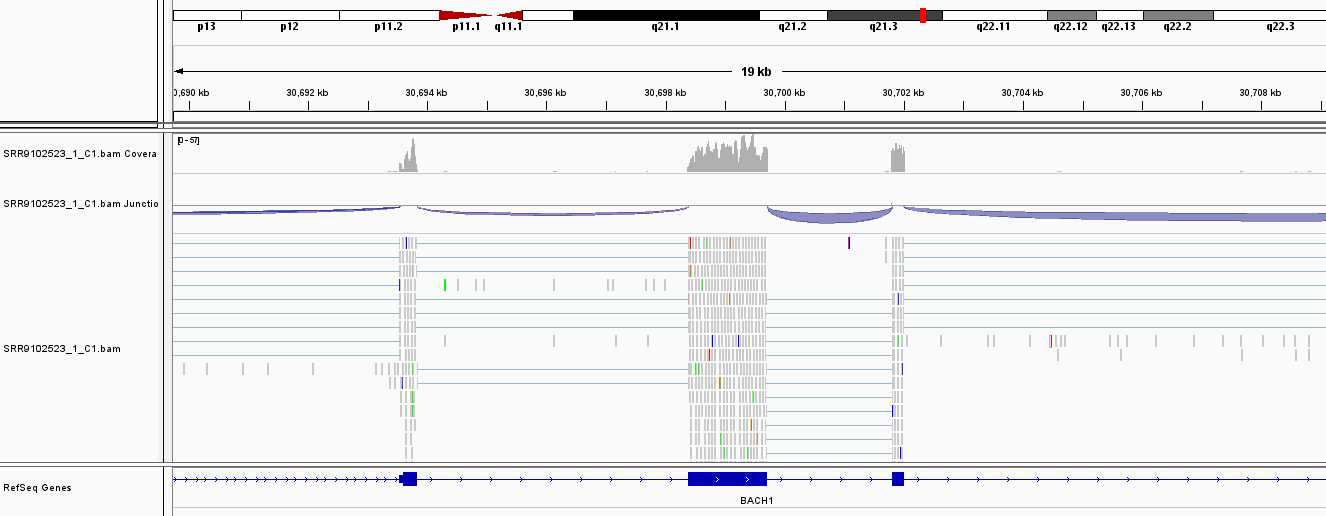

The next image is the same gene *BACH1* for the experimental set up-CBD1

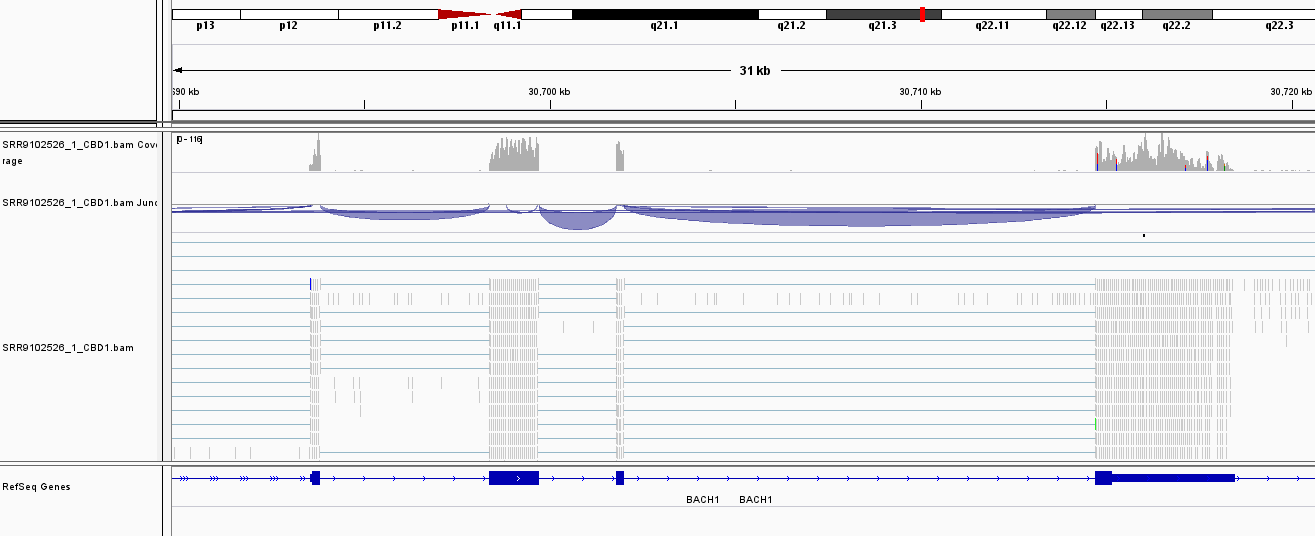

I also searched for the housekeeping gene HPRT1, which was mentioned as an internal control in the paper.
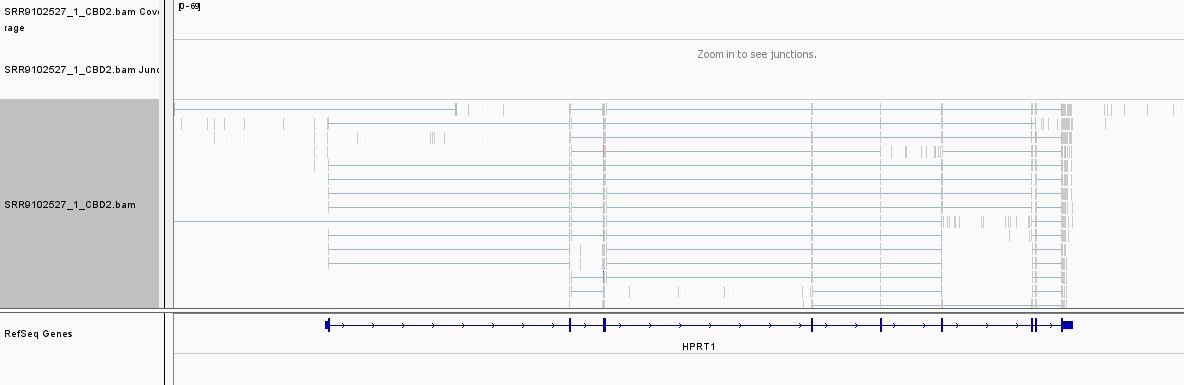

## Read to Gene Counts: *Quantification* - FEATURECOUNTS

In [79]:
ln -sf /mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf .
ls -l *gtf

lrwxrwxrwx 1 r0771801 domain users 56 Nov  4 15:18 gencode.v19.nopseudo.plus.sort.gtf -> /mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf


In [84]:
featureCounts -Q 10 -g gene_name -a gencode.v19.nopseudo.plus.sort.gtf -o all.counts SRR9102523_1_C1.bam SRR9102524_1_C2.bam SRR9102526_1_CBD1.bam SRR9102527_1_CBD2.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 4 BAM files                                      ||
||                           S SRR9102523_1_C1.bam                            ||
||                           S SRR9102524_1_C2.bam                            ||
||                           S SRR9102526_1_CBD1.bam                          ||
||                           S SRR9102527_1_CBD2.bam             

In [85]:
cut -f-6 all.counts > all.genedata.tsv

In [86]:
head all.genedata.tsv

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "10" "-g" "gene_name" "-a" "gencode.v19.nopseudo.plus.sort.gtf" "-o" "all.counts" "SRR9102523_1_C1.bam" "SRR9102524_1_C2.bam" "SRR9102526_1_CBD1.bam" "SRR9102527_1_CBD2.bam" 
Geneid	Chr	Start	End	Strand	Length
MIR1302-11	chr1;chr1;chr1;chr1;chr1;chr1	29554;30267;30366;30564;30976;30976	30039;30667;30503;30667;31097;31109	+;+;+;+;+;+	1021
FAM138A	chr1;chr1;chr1;chr1;chr1	34554;35245;35277;35721;35721	35174;35481;35481;36073;36081	-;-;-;-;-	1219
OR4F5	chr1	69091	70008	+	918
RP11-34P13.7	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	89295;92091;92230;110953;112700;112700;112700;120721;120775;129055;129055;129081;133374	91629;92240;92240;111357;112804;112804;112804;120932;120932;129173;129217;129223;133566	-;-;-;-;-;-;-;-;-;-;-;-;-	3569
RP11-34P13.8	chr1;chr1	89551;90287	90050;91105	-;-	1319
AL627309.1	chr1;chr1	134901;137621	135802;139379	-;-	2661
RP11-34P13.14	chr1;chr1	139790;140075	139847;140339	-;-	323
RP1

In [87]:
cut -f1,7- all.counts | grep -v '^#' > all.gene.counts

In [88]:
head all.gene.counts

Geneid	SRR9102523_1_C1.bam	SRR9102524_1_C2.bam	SRR9102526_1_CBD1.bam	SRR9102527_1_CBD2.bam
MIR1302-11	0	0	0	0
FAM138A	0	0	0	0
OR4F5	0	0	0	0
RP11-34P13.7	0	0	0	2
RP11-34P13.8	0	0	0	0
AL627309.1	80	54	144	152
RP11-34P13.14	0	0	0	0
RP11-34P13.13	24	13	35	18
RNU6-1100P	0	0	0	0


## Gene counts for a small subset of interesting genes

When we search for BACH1 :    
<font color=hotpink>BACH1</font>  BTB and CNC homology 1 transciption factor  
<font color=hotpink>BACH1-IT1</font>  BACH1 Intronic Transcript 1  
<font color=hotpink>BACH1-AS1</font>  BACH1 Antisense RNA 1  
<font color=hotpink>BACH1-IT2</font>  BACH1 Intronic Transcript 2    
<font color=hotpink>BACH1-IT3</font>  BACH1 Intronic Transcript 3    

In [21]:
grep BACH1 all.gene.counts

BACH1	2632	2379	4763	4612
BACH1-IT1	16	7	25	27
BACH1-AS1	2	0	6	2
BACH1-IT2	7	2	12	14
BACH1-IT3	0	0	0	1


In [22]:
grep SQSTM1 all.gene.counts

SQSTM1	2467	2924	43782	37621


In [27]:
grep FTL all.gene.counts

FTL	14919	15940	94428	86220


In [1]:
grep TXNRD1 all.gene.counts

TXNRD1	6366	6091	39129	29950
